# Bike Sharing  Dataset

https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

In [1]:
#!glue

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
plt.xkcd()

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("data/Bike-Sharing-Dataset/hour.csv")

In [6]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


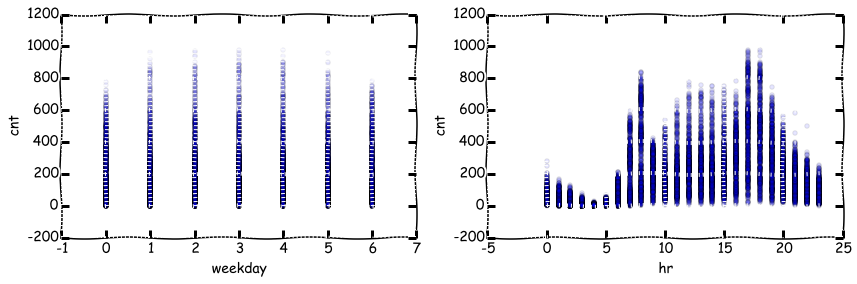

In [7]:
category = "cnt"

fig, axes = plt.subplots(1, 2, figsize=(14, 4))
df.plot(kind="scatter", x="weekday", y=category, alpha=0.05, ax=axes[0])
df.plot(kind="scatter", x="hr", y=category, alpha=0.1, ax=axes[1])

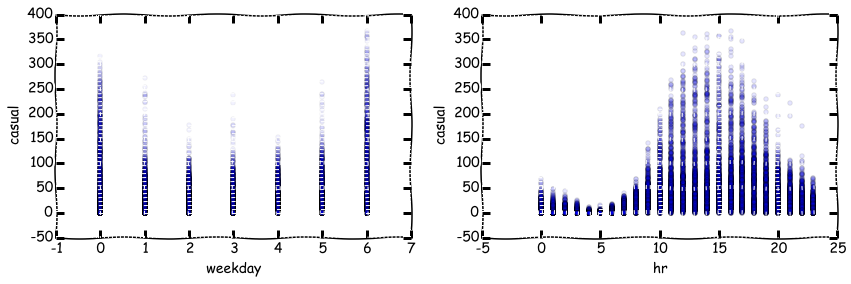

In [8]:
category = "casual"

fig, axes = plt.subplots(1, 2, figsize=(14, 4))
df.plot(kind="scatter", x="weekday", y=category, alpha=0.05, ax=axes[0])
df.plot(kind="scatter", x="hr", y=category, alpha=0.1, ax=axes[1])

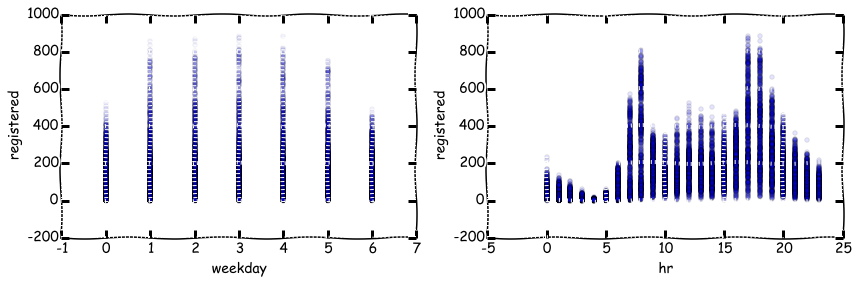

In [9]:
category = "registered"

fig, axes = plt.subplots(1, 2, figsize=(14, 4))
df.plot(kind="scatter", x="weekday", y=category, alpha=0.05, ax=axes[0])
df.plot(kind="scatter", x="hr", y=category, alpha=0.1, ax=axes[1])

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#from sklearn.svm import SVR
#from sklearn.gaussian_process import GaussianProcess
#from sklearn.linear_model import Ridge
#from sklearn.linear_model import Lasso

In [11]:
models = []
models.append(LinearRegression())
models.append(ElasticNet())
models.append(GradientBoostingRegressor())
models.append(RandomForestRegressor())
#models.append(RandomForestRegressor(max_leaf_nodes=10))

#models.append(Ridge(alpha=0.00000001))
#models.append(SVR())
#models.append(GaussianProcess())

In [12]:
from sklearn import cross_validation

In [13]:
df.shape

(17379, 17)

In [14]:
N = df.shape[0]

In [15]:
rp = np.random.permutation(N)

In [16]:
df.columns

Index([u'instant', u'dteday', u'season', u'yr', u'mnth', u'hr', u'holiday',
       u'weekday', u'workingday', u'weathersit', u'temp', u'atemp', u'hum',
       u'windspeed', u'casual', u'registered', u'cnt'],
      dtype='object')

In [17]:
#features = ['mnth', 'windspeed', 'weekday', 'temp']
#features = ['season', 'yr',  'mnth', 'hr', 'weekday', 'temp', 'hum', 'windspeed']
features = [u'season', u'yr', u'mnth', u'hr', u'holiday', u'weekday', u'workingday', u'weathersit', u'temp', u'atemp', u'hum', u'windspeed']
X = df[features].values

#y = df['registered'].values
#y = df['casual'].values
y = df['cnt'].values

# Random permutation
X = X[rp, :]
y = y[rp]

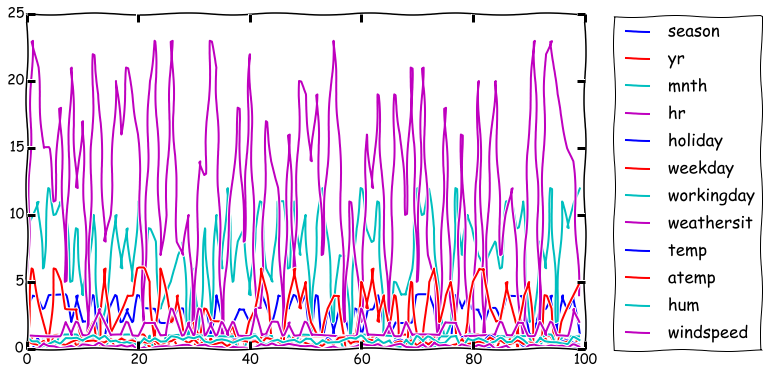

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(X[:100,:])
plt.legend(features, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)

In [19]:
from sklearn import preprocessing

In [20]:
X = preprocessing.scale(X)

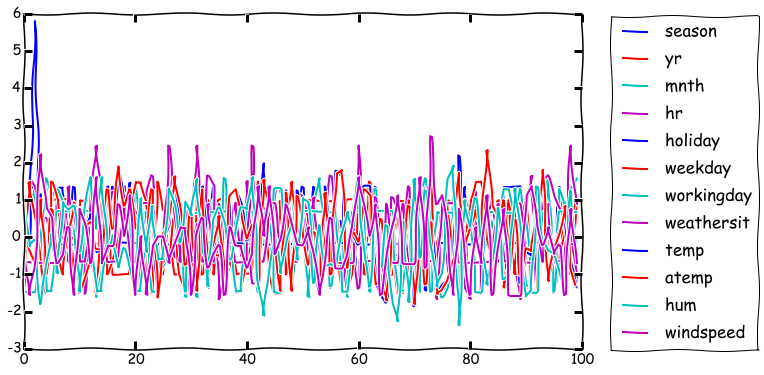

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(X[:100, :]);
plt.legend(features, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)

In [22]:
n_folds = 10
kf = cross_validation.KFold(N, n_folds=n_folds)

In [23]:
from sklearn.metrics import mean_squared_error as mse

In [24]:
metrics = {}
y_pred_trains = {}
y_pred_tests = {}

n_keep = 100

for model in models:
    
    print model
    model_name = str(model).split("(")[0]
    metrics[model_name] = np.zeros([2, n_folds])

    for i_fold, (train_idx, test_idx) in enumerate(kf):
        model.fit(X[train_idx, :], y[train_idx])
        y_pred_train = model.predict(X[train_idx, :])
        y_pred_test = model.predict(X[test_idx, :])

        train_mse = mse(y[train_idx], y_pred_train)
        test_mse = mse(y[test_idx], y_pred_test)

        metrics[model_name][0, i_fold] = train_mse
        metrics[model_name][1, i_fold] = test_mse

        if i_fold == 0:
            y_pred_trains['truth'] = y[train_idx]
            y_pred_trains[model_name] = y_pred_train
            
            y_pred_tests['truth'] = y[test_idx]
            y_pred_tests[model_name] = y_pred_test
        
        print train_mse
        print test_mse
        print "------------"

LinearRegression(copy_X=True, fit_intercept=True, normalize=False)
20027.8919848
20827.7518828
------------
20125.8582359
19958.2936571
------------
20196.7097013
19298.6146625
------------
20016.1812738
20939.9978397
------------
20218.0184289
19108.6886
------------
19951.6717792
21529.6581351
------------
20120.8055696
19989.2438334
------------
20102.9991921
20146.1910135
------------
20212.1348526
19177.9554268
------------
20073.3944241
20415.2205911
------------
ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute='auto',
      tol=0.0001, warm_start=False)
20800.5496638
21551.7634506
------------
20905.9655277
20517.8438684
------------
20973.9277298
20005.88535
------------
20786.8784146
21985.9967625
------------
20991.3000031
19851.3774181
------------
20727.6558891
22195.9596468
------------
20892.9304172
20993.8188435
------------
20874.8602269
21061.4162882
------------
21001.485504
19609.574

In [25]:
metrics

{'ElasticNet': array([[ 20800.54966378,  20905.96552769,  20973.92772977,  20786.87841461,
          20991.30000313,  20727.6558891 ,  20892.93041716,  20874.8602269 ,
          21001.48550401,  20847.12188533],
        [ 21551.76345058,  20517.84386839,  20005.88535   ,  21985.99676254,
          19851.37741815,  22195.95964683,  20993.81884355,  21061.41628815,
          19609.57402019,  21285.67740654]]),
 'GradientBoostingRegressor': array([[ 4761.02633355,  4899.25359726,  4743.27185056,  5034.60320753,
          4833.05975985,  4875.07756265,  4529.84098209,  5093.96426617,
          4844.24078785,  4733.69001867],
        [ 4768.32584599,  4988.98749404,  4685.60352836,  5365.15399753,
          4876.79530401,  5664.25883552,  4788.81218291,  5127.92637211,
          4275.08327193,  5213.42687298]]),
 'LinearRegression': array([[ 20027.89198479,  20125.85823595,  20196.70970127,  20016.18127377,
          20218.01842886,  19951.6717792 ,  20120.80556957,  20102.99919208,
       

(-0.5, 7.5)

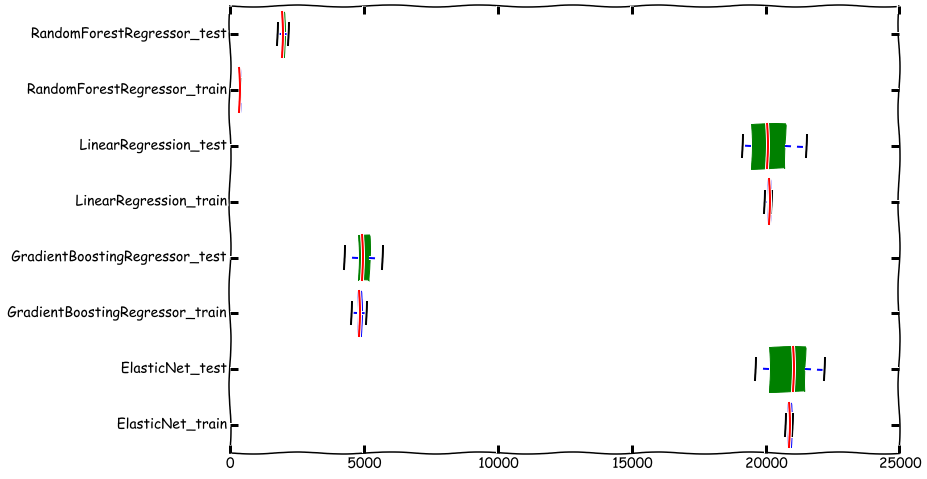

In [26]:
plt.clf()
plt.figure(figsize=(12, 8))

ylabels = []

for i, (k, v) in enumerate(metrics.items()):
    
    bp = plt.boxplot(v.transpose(), positions=[2*i, 2*i+1], vert=False, patch_artist=True, widths=0.8)
    ylabels += [k+"_train" , k+"_test"]
    for j, box in enumerate(bp['boxes']):
        if j % 2 == 0:
            box.set(color = 'blue')
            box.set(facecolor = 'blue')
        if j % 2 == 1:
            box.set(color = 'green')
            box.set(facecolor = 'green')

n_box = len(metrics) * 2
plt.yticks(np.arange(n_box), ylabels)
plt.ylim([-0.5, n_box-0.5])

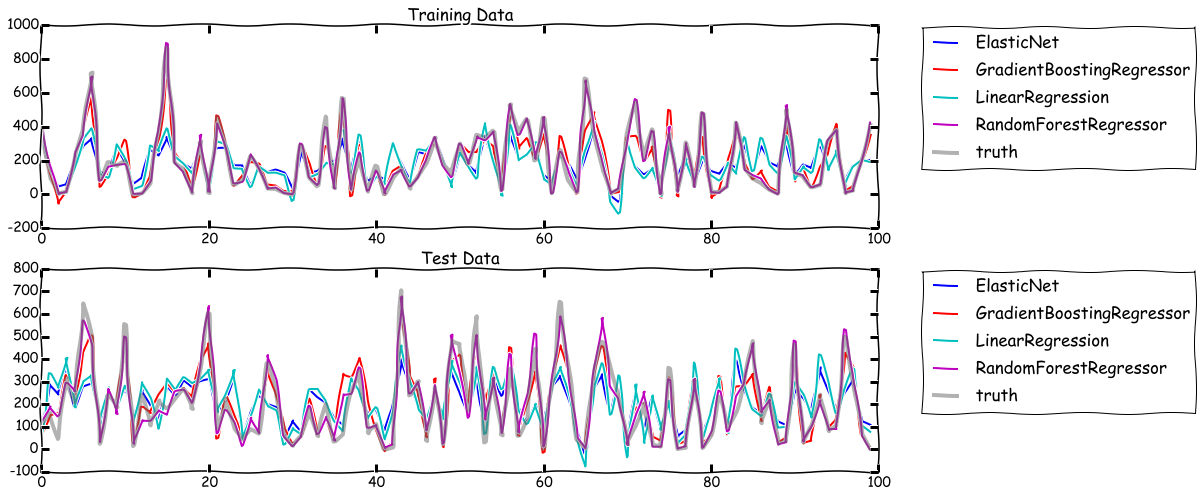

In [28]:
plt.clf()
plt.figure(figsize=(15, 8))

plt.subplot(2,1,1)
for k in sorted(y_pred_trains.keys()):
    line = plt.plot(y_pred_trains[k][:100])
    if k == 'truth':
        plt.setp(line, linewidth=4, alpha=0.3, color='k')    
plt.legend(sorted(y_pred_trains.keys()), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)
plt.title("Training Data")

plt.subplot(2,1,2)
for k in sorted(y_pred_tests.keys()):
    line = plt.plot(y_pred_tests[k][:100])
    if k == 'truth':
        plt.setp(line, linewidth=4, alpha=0.3, color='k')
plt.legend(sorted(y_pred_tests.keys()), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)
plt.title("Test Data")